##Importación de datos

In [73]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

df_tienda1 = pd.read_csv(url1)
df_tienda2 = pd.read_csv(url2)
df_tienda3 = pd.read_csv(url3)
df_tienda4 = pd.read_csv(url4)

df_tienda1.sample(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
693,Dashboards con Power BI,Libros,37600.0,0.0,22/02/2020,Maria Alfonso,Medellín,4,Tarjeta de crédito,2,6.25184,-75.56359
2296,Secadora de ropa,Electrodomésticos,1119200.0,60300.0,15/08/2022,Felipe Santos,Bogotá,5,Tarjeta de crédito,10,4.60971,-74.08175
1664,Smartwatch,Electrónicos,120400.0,4600.0,30/11/2021,Pedro Gomez,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175
1585,Ajedrez de madera,Juguetes,36900.0,2600.0,10/08/2022,Izabela de León,Bogotá,4,Cupón,1,4.60971,-74.08175
1767,TV LED UHD 4K,Electrónicos,1942200.0,105800.0,17/07/2020,Pedro Gomez,Barranquilla,5,Tarjeta de crédito,3,10.96854,-74.78132


###Compilacion de Datos

In [74]:
# Añadir una columna 'Tienda' a cada DataFrame
df_tienda1['Tienda'] = 'Tienda 1'
df_tienda2['Tienda'] = 'Tienda 2'
df_tienda3['Tienda'] = 'Tienda 3'
df_tienda4['Tienda'] = 'Tienda 4'

# Concatenar todos los DataFrames en uno solo
df = pd.concat([df_tienda1,df_tienda2,df_tienda3,df_tienda4], ignore_index=True)

# Obtener la lista de columnas actuales
columnas = df.columns.tolist()

# Mover 'Tienda' al principio de la lista
columnas.insert(0, columnas.pop(columnas.index('Tienda')))

# Reindexar el DataFrame con la nueva lista de columnas
df = df[columnas]

# Limpieza de nombres de columnas: quitar tildes y reemplazar espacios por "_"
df.columns = (
    df.columns
    .str.normalize('NFKD')
    .str.encode('ascii', errors='ignore')
    .str.decode('utf-8')
    .str.replace(' ', '_')
    .str.lower()
)

# Convertir la columna fecha_de_compra a datetime
df['fecha_de_compra'] = pd.to_datetime(df['fecha_de_compra'], errors='coerce')

#**1. Análisis de facturación**

##Calcular el valor de ventas totales realizadas por cada tienda

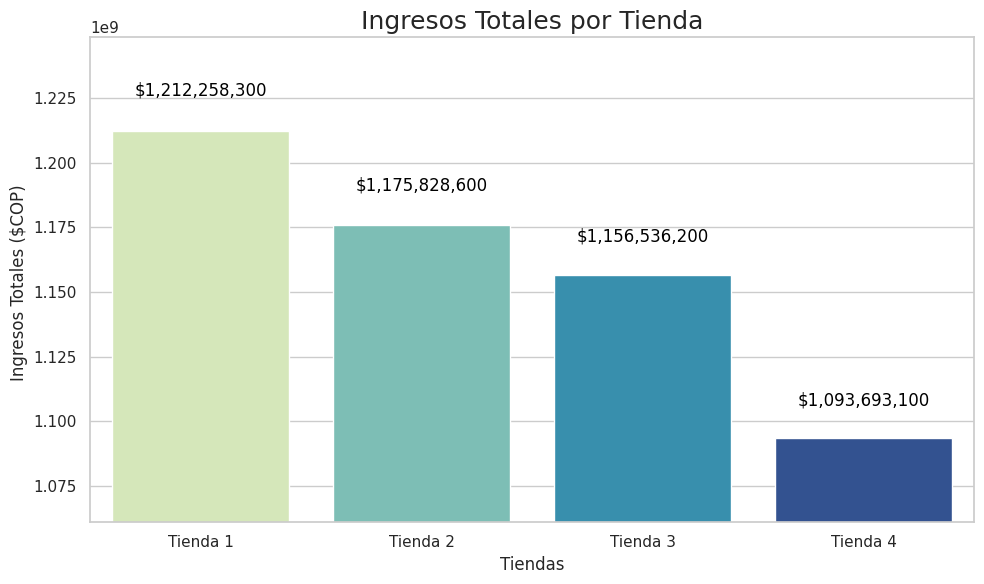

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos estilo visual
sns.set(style="whitegrid")

# Calculamos los ingresos
df['ingresos'] = df['precio'] + df['costo_de_envio']

# Agrupamos por tienda y sumamos ingresos
ingresos_por_tienda = df.groupby('tienda')['ingresos'].sum().reset_index()

# Ordenamos de mayor a menor ingreso
ingresos_por_tienda = ingresos_por_tienda.sort_values(by='ingresos', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=ingresos_por_tienda, x='tienda', y='ingresos', palette='YlGnBu')

# Agregamos los valores sobre cada barra
for index, row in ingresos_por_tienda.iterrows():
    barplot.text(index, row['ingresos'] + 0.01 * row['ingresos'], f"${row['ingresos']:,.0f}",
                 color='black', ha='center', va='bottom', fontsize=12)

# Títulos y etiquetas
plt.title('Ingresos Totales por Tienda', fontsize=18)
plt.xlabel('Tiendas', fontsize= 12)
plt.ylabel('Ingresos Totales ($COP) ', fontsize=12)
plt.ylim(ingresos_por_tienda['ingresos'].min() * 0.97, ingresos_por_tienda['ingresos'].max() * 1.03)
plt.tight_layout()
plt.show()


#**2. Ventas por categoría**

## Presentacion de la infomación de la cantidad de productos por vendidos agrupados por categoria y tienda

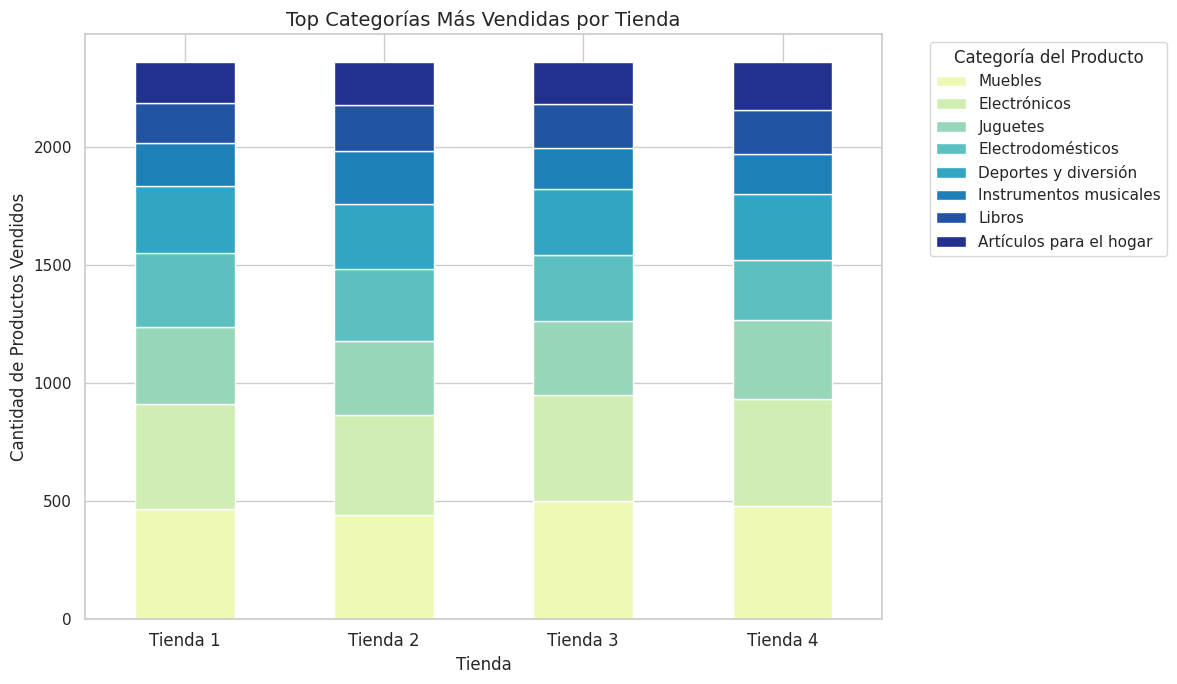

categoria_del_producto,Muebles,Electrónicos,Juguetes,Electrodomésticos,Deportes y diversión,Instrumentos musicales,Libros,Artículos para el hogar
Tienda 1,465,448,324,312,284,182,173,171
Tienda 2,442,422,313,305,275,224,197,181
Tienda 3,499,451,315,278,277,177,185,177
Tienda 4,480,451,338,254,277,170,187,201
Total,1886,1772,1290,1149,1113,753,742,730


In [76]:
# Aseguramos estilo visual
sns.set(style="whitegrid")

# Contamos cuántos productos se vendieron por Tienda y Categoría
categoria_tienda = df.groupby(['tienda', 'categoria_del_producto']).size().reset_index(name='ventas')

# Calcular el total de ventas por categoría para ordenar la leyenda
total_ventas_por_categoria = categoria_tienda.groupby('categoria_del_producto')['ventas'].sum().sort_values(ascending=False)

# Pivotear para tener tiendas como índice y categorías como columnas
pivot_df = categoria_tienda.pivot(index='tienda', columns='categoria_del_producto', values='ventas').fillna(0)

# Reindexar las columnas de pivot_df según el orden de las ventas totales
pivot_df = pivot_df[total_ventas_por_categoria.index]

# Gráfico de barras apiladas usando Seaborn
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), color=sns.color_palette('YlGnBu', n_colors=len(pivot_df.columns)))

# Rotar las etiquetas del eje x explícitamente
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)

# Títulos y etiquetas
plt.title('Top Categorías Más Vendidas por Tienda', fontsize=14)
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Productos Vendidos')
plt.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calcular la suma de cada columna (total por categoría)
sum_row = pivot_df.sum(axis=0)

# Crear un nuevo DataFrame con la fila de suma y asignarle un nombre de índice descriptivo
sum_df = pd.DataFrame(sum_row, columns=['Total']).T

# Concatenar el DataFrame original con la fila de suma
pivot_df_total = pd.concat([pivot_df, sum_df])

display(pivot_df_total)

#**3. Calificación promedio de la tienda**

##Muestra de forma agrupada los datos de las calificaciones entregadas para cada tienda

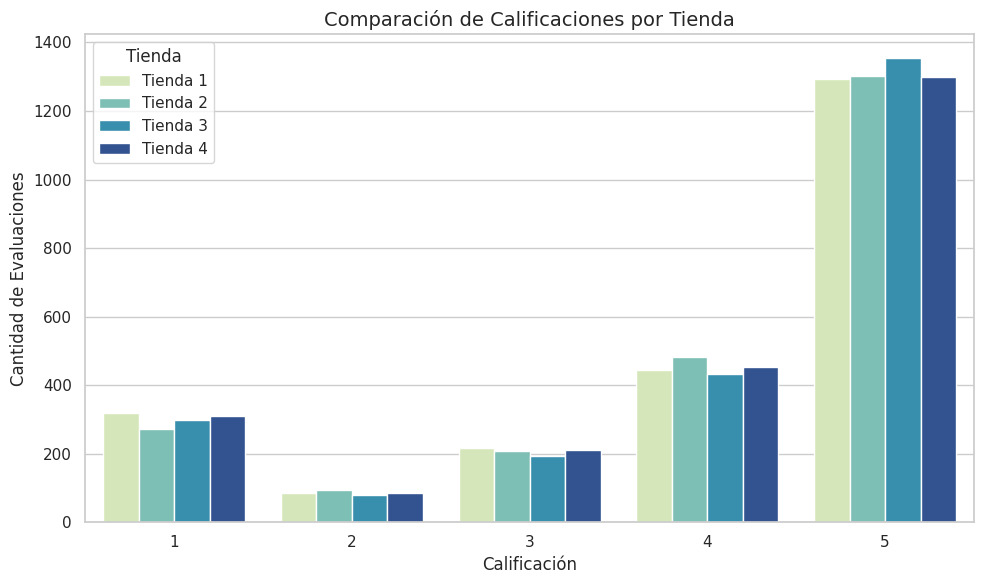

,Calificacion 1,Calificacion 2,Calificacion 3,Calificacion 4,Calificacion 5
tienda,,,,,
Tienda 1,319,86,218,444,1292
Tienda 2,273,93,209,482,1302
Tienda 3,297,79,193,434,1356
Tienda 4,310,85,210,453,1300


In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='calificacion', hue='tienda', palette='YlGnBu')

plt.title('Comparación de Calificaciones por Tienda', fontsize=14)
plt.xlabel('Calificación')
plt.ylabel('Cantidad de Evaluaciones')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# Calcular la frecuencia de cada calificación por tienda
frecuencia_calificaciones = df.groupby(['tienda', 'calificacion']).size().reset_index(name='cantidad')

# Pivotear el DataFrame para tener tiendas como filas y calificaciones como columnas
pivot_frecuencia_calificaciones = frecuencia_calificaciones.pivot(index='tienda', columns='calificacion', values='cantidad').fillna(0)

# Renombrar las columnas para mayor claridad
pivot_frecuencia_calificaciones.columns = [f'Calificacion {col}' for col in pivot_frecuencia_calificaciones.columns]

# Mostrar el DataFrame resumen en formato de cuadrícula
display(pivot_frecuencia_calificaciones)

##Informacion de los promedios de calificacion por cada tienda
Atender que los promedios son bastante cercanos, por lo cual se establecieron rangos de presentación de los datos entre los los valores 3.95 a 4.10 en el eje y.

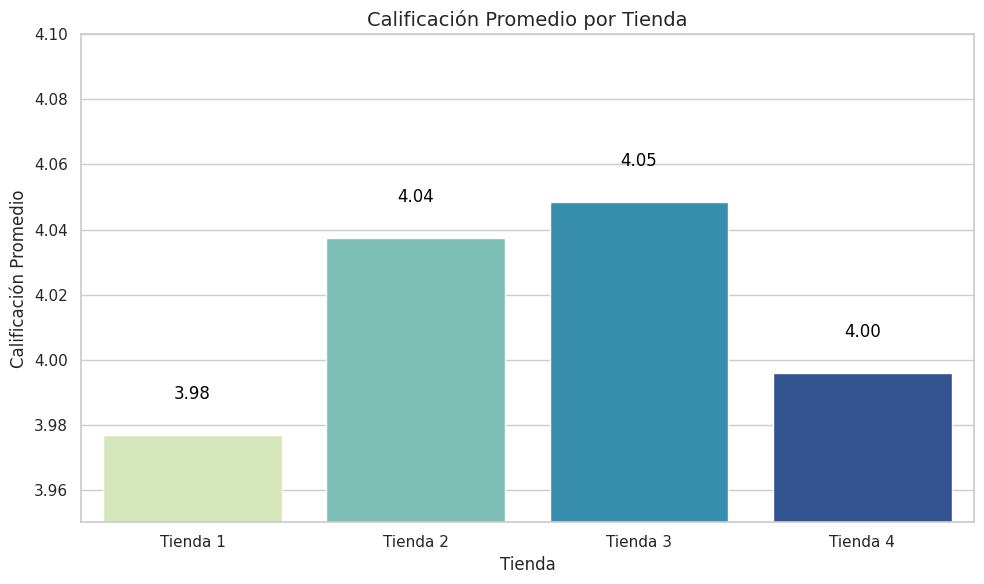

,tienda,calificacion
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


In [78]:
# Calcular la calificación promedio por tienda
calificacion_promedio_tienda = df.groupby('tienda')['calificacion'].mean().reset_index()

# Crear un gráfico de barras para mostrar la calificación promedio por tienda
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=calificacion_promedio_tienda, x='tienda', y='calificacion', palette='YlGnBu')

# Añadir los valores de calificación promedio sobre cada barra
for index, row in calificacion_promedio_tienda.iterrows():
    barplot.text(index, row['calificacion'] + 0.01, f"{row['calificacion']:.2f}",
                 color='black', ha='center', va='bottom', fontsize=12)

# Títulos y etiquetas
plt.title('Calificación Promedio por Tienda', fontsize=14)
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(3.95, 4.1) # Establecer el límite del eje y a 5 para que sea más intuitivo con calificaciones de 1 a 5
plt.tight_layout()
plt.show()

display(calificacion_promedio_tienda)

#**4. Productos más y menos vendidos**

##Se representan graficamente los 5 producto más y menos vendidos por cada tienda

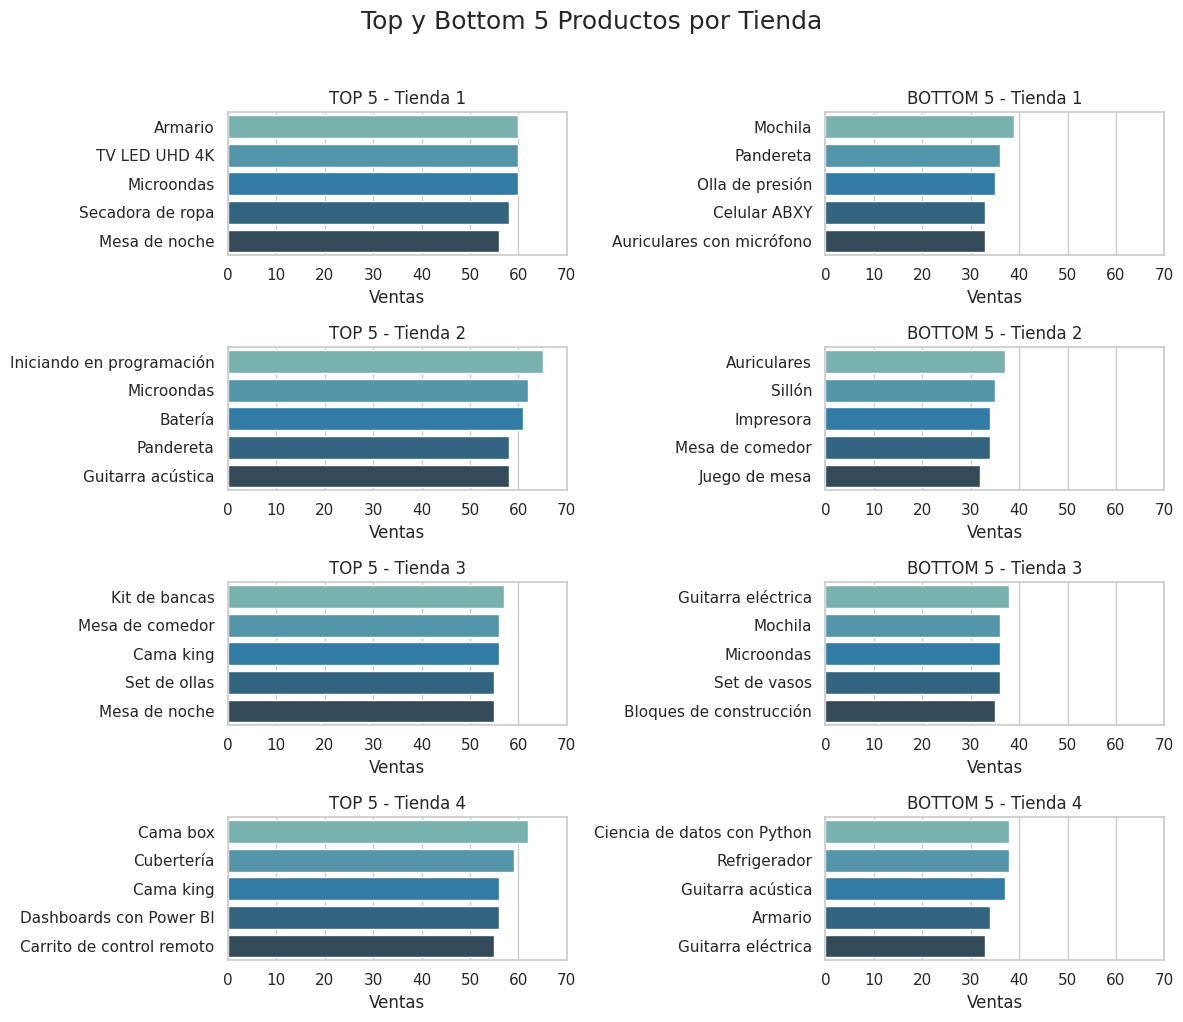

In [79]:
import numpy as np

# Estilo visual
sns.set(style="whitegrid")

# Obtener la frecuencia de productos por tienda
ventas_productos = df.groupby(['tienda', 'producto']).size().reset_index(name='ventas')

fig, axes = plt.subplots(4, 2, figsize=(12, 10))
fig.suptitle('Top y Bottom 5 Productos por Tienda', fontsize=18, y=1.02)

for i, tienda in enumerate(df['tienda'].unique()):
    # Filtrar por tienda
    data_tienda = ventas_productos[ventas_productos['tienda'] == tienda]

    # Top 5 más vendidos
    top = data_tienda.sort_values(by='ventas', ascending=False).head(5)
    sns.barplot(data=top, y='producto', x='ventas', ax=axes[i, 0], palette='YlGnBu_d')
    axes[i, 0].set_title(f'TOP 5 - {tienda}')
    axes[i, 0].set_xlabel('Ventas')
    axes[i, 0].set_ylabel('')
    axes[i, 0].set_xlim(0, 70)
    axes[i, 0].set_xticks(np.arange(0, 71, 10))

    # Bottom 5 menos vendidos
    bottom = data_tienda.sort_values(by='ventas', ascending=False).tail(5)
    sns.barplot(data=bottom, y='producto', x='ventas', ax=axes[i, 1], palette='YlGnBu_d')
    axes[i, 1].set_title(f'BOTTOM 5 - {tienda}')
    axes[i, 1].set_xlabel('Ventas')
    axes[i, 1].set_ylabel('')
    axes[i, 1].set_xlim(0, 70)
    axes[i, 1].set_xticks(np.arange(0, 71, 10))

plt.tight_layout()
plt.show()

# **5. Envío promedio por tienda**

##Se muestra el porcentaje del promedio de los costos de envios de cada tienda

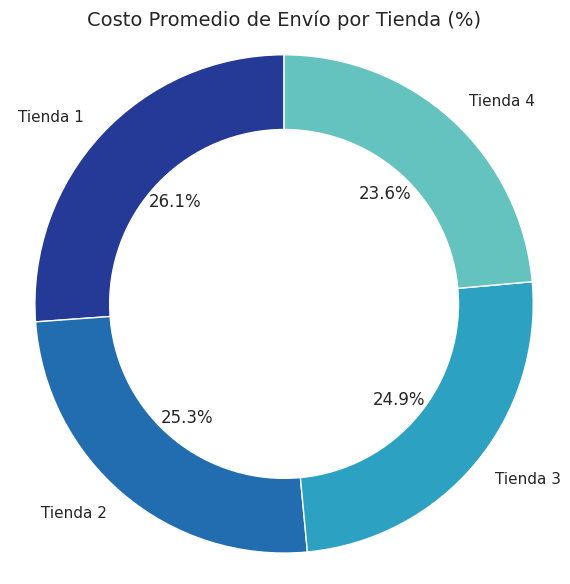

In [80]:
# Asegurar estilo visual
sns.set(style="whitegrid")

# Calcular el costo promedio de envío por tienda (incluido aquí para evitar NameError)
costo_envio_promedio = df.groupby('tienda')['costo_de_envio'].mean().reset_index()

# Ordenar de mayor a menor (opcional para el gráfico de dona, pero útil para la tabla subyacente)
costo_envio_promedio = costo_envio_promedio.sort_values(by='costo_de_envio', ascending=False)

# Calcula el porcentaje promedio de costo de envio para cada tienda
costo_envio_promedio['percentage'] = costo_envio_promedio['costo_de_envio'] / costo_envio_promedio['costo_de_envio'].sum() * 100

# Crea un grafico del tipo dona
plt.figure(figsize=(6, 6))
plt.pie(costo_envio_promedio['percentage'], labels=costo_envio_promedio['tienda'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlGnBu_r'))

# Crea un circulo dentro del gráfico de dona
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Costo Promedio de Envío por Tienda (%)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


#**6. Rentabilidad en Operacional**

## Presentación de la rentabilidad operacional o logistica. Calculo sin contiene el costo de los productos

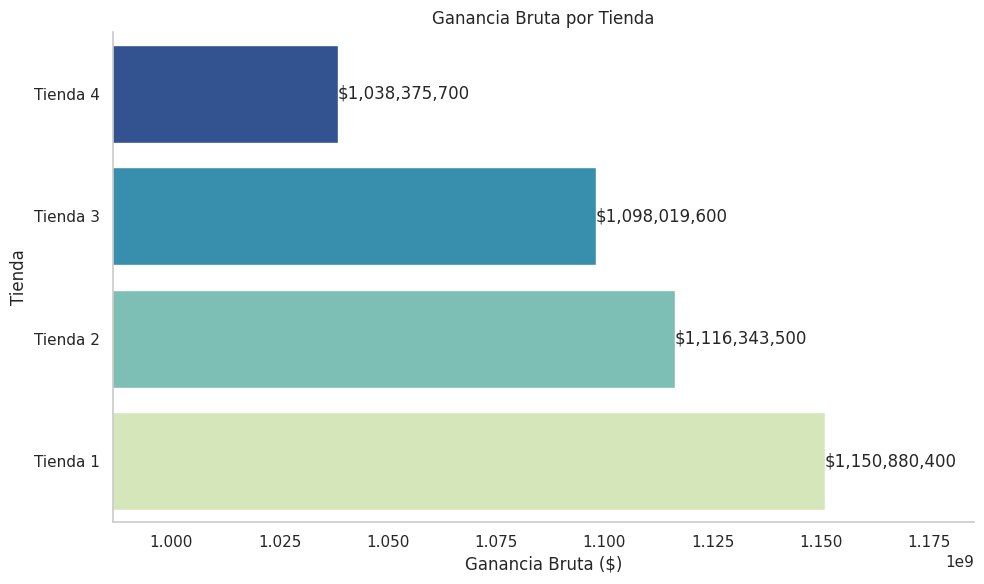

In [81]:
df['Ganancia_bruta'] = df['ingresos'] - df['costo_de_envio']

ganancia_tienda = df.groupby('tienda')['Ganancia_bruta'].sum().sort_values().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=ganancia_tienda, x='Ganancia_bruta', y='tienda', palette='YlGnBu_r')

for i, val in enumerate(ganancia_tienda['Ganancia_bruta']):
    plt.text(val + 0.5, i, f"${val:,.0f}", va='center')

plt.title('Ganancia Bruta por Tienda')
plt.xlabel('Ganancia Bruta ($)')
plt.ylabel('Tienda')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim(ganancia_tienda['Ganancia_bruta'].min() * 0.95, ganancia_tienda['Ganancia_bruta'].max() * 1.03)
plt.tight_layout()
plt.grid(axis='x')
plt.show()

#**Informe de Análisis de Ventas y Rentabilidad por Tienda**

##Introducción

Este informe presenta un análisis exploratorio de los datos de ventas de cuatro tiendas diferentes. El objetivo principal es comprender el rendimiento de cada tienda en términos de ingresos, ventas por categoría de producto, calificaciones promedio y rentabilidad bruta, utilizando los datos proporcionados que abarcan diversas transacciones y detalles de productos con el fin de elegir que tienda tiene que ser cerrada.

## Desarrollo

Se han realizado los siguientes análisis:

1.  **Análisis de Facturación:**

    Se calcularon los ingresos totales por tienda sumando el precio del producto y el costo de envío. El gráfico de barras muestra que la Tienda 1 generó los mayores ingresos con aproximadamente `$1,212` millones, seguida por la Tienda 2 `$1,176` millones, Tienda 3 `$1,157` millones y Tienda 4 `$1,094` millones de $COP.

2.  **Ventas por Categoría:**

    Se analizó la cantidad de productos vendidos por categoría en cada tienda. El gráfico de barras apiladas y la tabla resumen muestran que las categorías "Muebles" (1886 unidades vendidas en total) y "Electrónicos" (1772 unidades vendidas en total) son las más vendidas en general a través de todas las tiendas.

3.  **Calificación Promedio:**

    Se calculó la calificación promedio otorgada por los clientes a cada tienda. El gráfico de barras y la tabla muestran que las calificaciones promedio son bastante cercanas entre sí, con ligeras variaciones entre 3.98 y 4.05. La Tienda 3 tiene la calificación promedio más alta (4.05), mientras que la Tienda 1 tiene la más baja (3.98).

4.  **Productos Más y Menos Vendidos:**

    Se identificaron los productos más y menos vendidos en cada tienda, presentando una tendencia similar pormedio entre los TOP 5 de cantidades de productos (60 a 65 unidades) como en los BOTTOM 5 (25 a 30 unidades)..

5.  **Envío Promedio por Tienda:**

    Se calculó y visualizó el costo promedio de envío por tienda respecto el total de envios, reflejando para la tienda 4 el más bajo porcentaje de envios con 23.6%.

6.  **Rentabilidad Bruta Operacional:**

    Se calculó la ganancia bruta por tienda restando el costo de envío de los ingresos (sin considerar el costo del producto). El gráfico de barras horizontales muestra que la Tienda 1 presenta la mayor ganancia bruta con `$1,151` millones, seguida por la Tienda 2 `$1,116` millones, Tienda 3 `$1,098` millones y Tienda 4 `$1,038` millones \$COP


## Conclusión
Con base en los análisis realizados, la **Tienda 1** parece ser la de mejor rendimiento general, liderando tanto en ingresos totales como en ganancia bruta. Las categorías de productos más populares son "Muebles" y "Electrónicos". Las calificaciones promedio de las tiendas son consistentemente altas y muy similares entre sí. La **Tienda 3**, a pesar de no liderar en ingresos o ganancia bruta, tiene la calificación promedio más alta (4.05).

Considerando los resultados de ingresos totales y ganancia bruta, la **Tienda 4** presenta el rendimiento más bajo en ambas métricas, con ingresos totales de `$1,093,693,100` y una ganancia bruta de `$1,038,376,000` $COP. Aunque la decisión de cerrar una tienda implica considerar múltiples factores más allá de estas métricas operacionales (como costos fijos, potencial de crecimiento, etc.), basándonos estrictamente en los datos de ventas y rentabilidad bruta analizados, la **Tienda 4** sería la candidata principal a considerar para un posible cierre debido a su menor desempeño financiero en comparación con las otras tiendas.

Para futuras investigaciones, sería interesante analizar la rentabilidad neta (incluyendo el costo del producto) para una evaluación a nivel finaciera mas certera como apoyo para la toma de desciones.